In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

In [2]:
# This file will be generated by Irradiation_Data_Generator.py
file = open('output.txt', 'r+')

In [3]:
lat = []
lon = []
weight = []
data_test = []
content = file.readlines()
for line in content:
    splited_line = line.split(';')
    lat.append(float(splited_line[0]))
    lon.append(float(splited_line[1]))
    temp1 = splited_line[2].strip('\n')
    temp2 = temp1.replace("'", "")    
    weight.append(float(temp2))

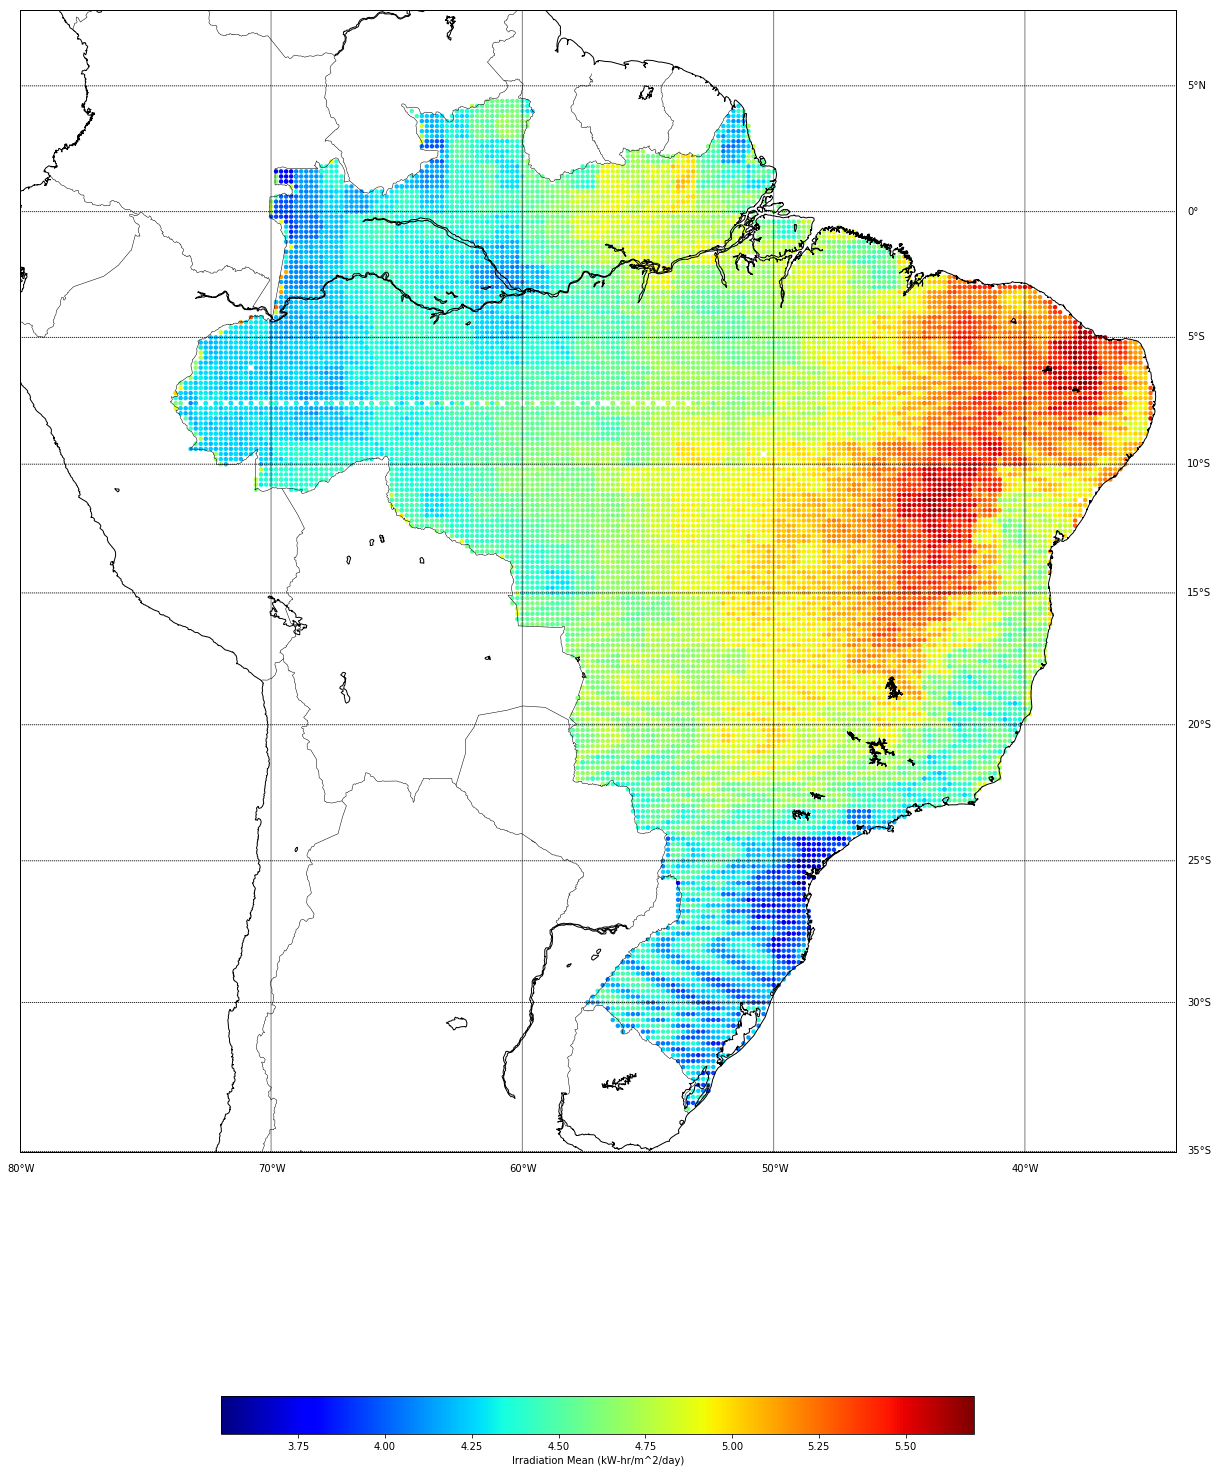

In [12]:
m = Basemap(projection='merc',llcrnrlat=-35,urcrnrlat=8,\
            llcrnrlon=-80,urcrnrlon=-34,lat_ts=20,resolution='i')
m.drawcoastlines()
m.drawcountries()
#m.drawstates()
# draw parallels and meridians.
parallels = np.arange(-90.,91.,5.)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[False,True,True,False])
# Draw Meridians and Labels
meridians = np.arange(-180.,181.,10.)
m.drawmeridians(meridians,labels=[True,False,False,True])
m.drawmapboundary(fill_color='white')

x, y = m(lon, lat)
jet = plt.cm.get_cmap('jet')
sc = plt.scatter(x,y, c=weight, vmin=min(weight), vmax =max(weight), cmap=jet, s=20, edgecolors='none')
cbar = plt.colorbar(sc, orientation="horizontal", shrink = 0.3)
cbar.set_label("Irradiation Mean (kW-hr/m^2/day)")

plt.rcParams['figure.figsize'] = [40, 30]
plt.show()